В этом ноутбуке мы определим примерное количество слов в предложениях романа "Война и мир" Л. Толстого и сравним их с длиной предложений в рассказе В. Астафьева "Васюткино озеро".

In [ ]:
# Скачаем два текста: "Войну и мир" Толстого и "Васюткино озеро" Астафьева.
!wget 'https://drive.google.com/uc?export=download&id=1ZIElnB1MivsynYRkd5XkrrXqiko-HR0d' -O 'leo.txt'
!wget 'https://docs.google.com/uc?export=download&id=15H5OfD3eabJz6TdmFj-8H7-rVQNdnCky' -O 'oz.txt'

--2024-12-14 20:27:21--  https://drive.google.com/uc?export=download&id=1ZIElnB1MivsynYRkd5XkrrXqiko-HR0d
Resolving drive.google.com (drive.google.com)... 74.125.20.101, 74.125.20.100, 74.125.20.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZIElnB1MivsynYRkd5XkrrXqiko-HR0d&export=download [following]
--2024-12-14 20:27:21--  https://drive.usercontent.google.com/download?id=1ZIElnB1MivsynYRkd5XkrrXqiko-HR0d&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.117.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2730682 (2.6M) [application/octet-stream]
Saving to: ‘leo.txt’

leo.txt             100%[===================>]   2.60M  --.-KB/s    in 0.

In [ ]:
# Создадим переменные с путями к файлам.
leo_file = 'leo.txt'
oz_file = 'oz.txt'

In [ ]:
# Откроем файлы и создадим переменные с текстами этих файлов.
with open(leo_file, 'r') as leo:
    leo_text = leo.read()

with open(oz_file, 'r') as oz:
    oz_text = oz.read()

In [ ]:
# Считать предложения будем библиотекой NLTK.
import nltk

In [ ]:
# Импортируем нужный модуль и скачаем еще пару зависимых модулей.
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Разбиваем текст на предложения, в параметрах указываем русский язык.
leo_sents = sent_tokenize(leo_text, language='russian')
oz_sents = sent_tokenize(oz_text, language='russian')

In [ ]:
# Посчитаем, сколько всего предложений в двух текстах.
total_leo_sents = len(leo_sents)
total_oz_sents = len(oz_sents)
# Т.к. "Война и мир" - роман, а "Васюткино озеро" - рассказ, то, конечно,
# в "Озере" предложений меньше. Но по поводу их длины отмечу, что можно
# представить рассказ и из очень длинных предложений. Просто их будет меньше.
# А роман может быть написан и не очень длинными предложениями.
print(f'Число предложений в "Войне и мире": {total_leo_sents}, в "Васюткином озере": {total_oz_sents}.')

Число предложений в "Войне и мире": 17252, "Васюткином озере": 792.


In [ ]:
# Более показательной будет средняя длина предложений. Посчитаем грубо, деля
# предложения на слова по пробелам методом split.
length_of_leo_sents = [len(s.split()) for s in leo_sents]
length_of_oz_sents = [len(s.split()) for s in oz_sents]
print(f'Средняя длина предложения в "Войне и мире": {sum(length_of_leo_sents)/total_leo_sents}, в "Васюткином озере": {sum(length_of_oz_sents)/total_oz_sents}.')
# У Толстого ожидаемо в среднем предложения длиннее.

Средняя длина предложения в "Войне и мире": 14.183341061905866, "Васюткином озере": 9.231060606060606.


In [ ]:
# Посмотрим на максимальные длины предложений.
print(f'Максимальная длина предложения в "Войне и мире": {max(length_of_leo_sents)}, в "Васюткином озере": {max(length_of_oz_sents)}.')
# Толстой лидирует очень значительно.

Максимальная длина предложения в "Войне и мире": 114, в "Васюткином озере": 41.


In [ ]:
# Последнее, что я хочу сделать, это посмотреть на распределение предложений по
# их длине - построим график распределения при помощи matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Само распределение посчитаем с Counter.
from collections import Counter

In [ ]:
# Посчитаем, сколько в текстах предложений разной длины - для этого Counter
# создаст словарь, где ключем будет длина предложения, а значением - сколько
# предложений таковой длины встретилось в тексте.
count_leo = Counter(length_of_leo_sents)
count_oz = Counter(length_of_oz_sents)

In [ ]:
# Теперь сортируем этот словарь по ключам, т.е. расставим полученные пары ключ-значение
# по длине предложений от 1 слова до максимальной длины. Значение, напоминаю, это
# сколько предложений данной длины встретилось в тексте.
ordered_leo = sorted(count_leo.items(), key=lambda pair: pair[0])
ordered_oz = sorted(count_oz.items(), key=lambda pair: pair[0])

In [ ]:
# Вот такая сортировка для "Озера"
ordered_oz

[(1, 23),
 (2, 44),
 (3, 56),
 (4, 87),
 (5, 60),
 (6, 51),
 (7, 53),
 (8, 37),
 (9, 50),
 (10, 39),
 (11, 46),
 (12, 43),
 (13, 37),
 (14, 29),
 (15, 28),
 (16, 21),
 (17, 13),
 (18, 17),
 (19, 11),
 (20, 12),
 (21, 7),
 (22, 3),
 (23, 4),
 (24, 4),
 (26, 2),
 (27, 1),
 (28, 2),
 (29, 3),
 (30, 2),
 (31, 1),
 (32, 2),
 (33, 1),
 (38, 1),
 (40, 1),
 (41, 1)]

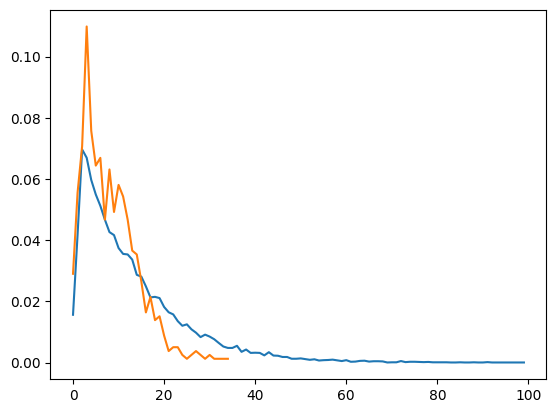

In [ ]:
# Теперь нарисуем обычный точечный график - он нам все хорошо покажет.
# Но нам надо нормировать значения по их доле от общего числа предложений.
# Иначе в очень большем тексте будут очень большие значения (предложений то там больше).
# Для этого поделим каждое значение на общее число предложений в тексте.
plt.plot([n[1]/total_leo_sents for n in ordered_leo])
plt.plot([n[1]/total_oz_sents for n in ordered_oz])
# Ну что, вот и видно стратегию двух писателей: Астафьев (оранжевым) почти все свои предложения
# ограничил длиной 20, у Толстого (синим) длина предложений плавно растет, а кривая снижается и
# образует длинный хвост, который переходит за сотню - это и есть те самые
# толстовские предложения.